In [1]:
import numpy as np
import pandas as pd
import scipy.io

# read the coordination
XYZ_Coord = scipy.io.loadmat('data\XYZcoord1.mat')
XYZ_C = np.array(XYZ_Coord ['XYZ1'])
XYZ_C

array([[ 0.6851533 ,  1.17897583,  3.52402492],
       [ 1.00216962,  1.21572705, 29.32701994],
       [ 1.15125728,  3.32476951, 23.614195  ],
       ...,
       [90.13576705, 15.58773776, 34.16825421],
       [90.73121678, 16.76765189, 13.4218382 ],
       [89.09981586, 18.50040944, 13.39066304]])

In [2]:
# arrange the data set clustering by the Euclidean distance
Euclidean_distance = []
for i in range(np.size(XYZ_C,0)):
    for j in range(i+1,np.size(XYZ_C,0)):
        temp = 0
        for k in range(np.size(XYZ_C,1)):
            temp += (XYZ_C[i][k] - XYZ_C[j][k])**2
        Euclidean_distance.append([i+1, j+1, temp**0.5])
np.array(Euclidean_distance)
Euclidean_distance

[[1, 2, 25.80496855125289],
 [1, 3, 20.20981486882899],
 [1, 4, 11.132279784128958],
 [1, 5, 0.7976365699656169],
 [1, 6, 19.088004799695113],
 [1, 7, 12.826482265513928],
 [1, 8, 30.546164058561313],
 [1, 9, 32.62693301069382],
 [1, 10, 34.93887341920057],
 [1, 11, 10.08627763715527],
 [1, 12, 4.326481771642854],
 [1, 13, 4.977710571800679],
 [1, 14, 0.7830280960269956],
 [1, 15, 22.867045273676354],
 [1, 16, 2.8946578517653476],
 [1, 17, 3.468282392164358],
 [1, 18, 19.942827554416912],
 [1, 19, 4.009928880615733],
 [1, 20, 34.35633377703943],
 [1, 21, 19.044367959533442],
 [1, 22, 24.521216515020296],
 [1, 23, 22.75625391580832],
 [1, 24, 31.211941353760437],
 [1, 25, 2.182515965394812],
 [1, 26, 21.406014640446067],
 [1, 27, 25.552700790143714],
 [1, 28, 26.97266885144425],
 [1, 29, 10.733347596600636],
 [1, 30, 21.525633763753635],
 [1, 31, 36.11484360460512],
 [1, 32, 13.16999970342856],
 [1, 33, 21.13121488339739],
 [1, 34, 5.386940769971268],
 [1, 35, 21.564060293202665],
 [1, 

In [3]:
# read the data set clustering by the geodesic distance from csv file
XYZ_Edges = pd.read_csv('data\Edges.csv')
XYZ_Edges

,Source,Target,Weight,Type
0,1,5,1.253704,Undirected
1,1,14,1.277093,Undirected
2,1,16,0.345464,Undirected
3,1,17,0.288327,Undirected
4,1,19,0.249381,Undirected
...,...,...,...,...
6031,1995,2000,0.104098,Undirected
6032,1996,1997,0.213520,Undirected
6033,1997,1999,0.154084,Undirected
6034,1997,2000,0.140709,Undirected


In [4]:
# arrange the data set clustering by the geodesic distance
XYZ_E = np.array(XYZ_Edges.iloc[:, 0:3].values)
XYZ_E

array([[1.0000000e+00, 5.0000000e+00, 1.2537038e+00],
       [1.0000000e+00, 1.4000000e+01, 1.2770934e+00],
       [1.0000000e+00, 1.6000000e+01, 3.4546397e-01],
       ...,
       [1.9970000e+03, 1.9990000e+03, 1.5408415e-01],
       [1.9970000e+03, 2.0000000e+03, 1.4070934e-01],
       [1.9990000e+03, 2.0000000e+03, 4.2014991e-01]])

In [5]:
# conda install python-louvain networkx
import community
import networkx as nx
import matplotlib.pyplot as plt

#Use pre-defined linkage to constructure whole network
G_geodesic = nx.Graph()
for i in range(0, len(XYZ_E)):  
    e = ( str(int(XYZ_E[i][0])), str(int(XYZ_E[i][1])), XYZ_E[i][2] )
    G_geodesic.add_weighted_edges_from([(e)])

G_euclidean = nx.Graph()
for i in range(0, len(Euclidean_distance)):
    e = ( str(int(Euclidean_distance[i][0])), str(int(Euclidean_distance[i][1])), Euclidean_distance[i][2] )
    G_euclidean.add_weighted_edges_from([(e)]) 

In [6]:
partition = community.best_partition(G_geodesic)
size = float(len(set(partition.values())))
mod = community.modularity(partition,G_geodesic)
print("community_geodesic:", size)
print("modularity_geodesic:", mod)

partition2 = community.best_partition(G_euclidean)
size2 = float(len(set(partition2.values())))
mod2 = community.modularity(partition2,G_euclidean)
print("community_euclidean:", size2)
print("modularity_euclidean:", mod2)

community_geodesic: 43.0
modularity_geodesic: 0.9372312311954784
community_euclidean: 1.0
modularity_euclidean: 3.3306690738754696e-15


'Geodesic community'

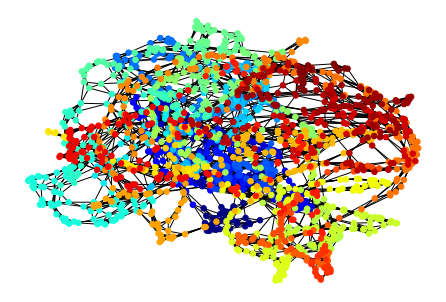

'Euclidean community'

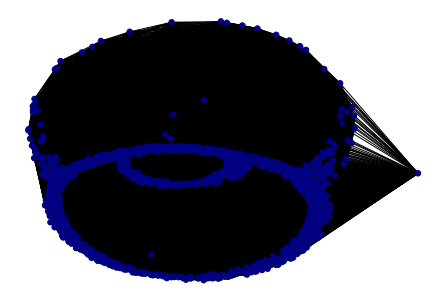

In [7]:
#assign node color based on community in network
display('Geodesic community')
for com in set(partition.values()):
    members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
values = [partition.get(node) for node in G_geodesic.nodes()]
nx.draw_spring(G_geodesic, cmap = plt.get_cmap('jet'), node_color = values, node_size = 30, with_labels = False)
plt.show()

display('Euclidean community')
for com in set(partition2.values()):
    members = list_nodes = [nodes for nodes in partition2.keys() if partition2[nodes] == com]
values = [partition2.get(node) for node in G_euclidean.nodes()]
nx.draw_spring(G_euclidean, cmap = plt.get_cmap('jet'), node_color = values, node_size = 30, with_labels = False)
plt.show()

In [8]:
#assign data point color based on community in realspace
label = np.zeros((len(XYZ_C),1))
for j in set(partition.values()) :
    for i in range(len(XYZ_C)) :
        if partition[str(i+1)] == j :            
            label[i] =  j
labelRE = np.reshape(label, len(XYZ_C))

label2 = np.zeros((len(XYZ_C),1))
for j in set(partition2.values()) :
    for i in range(len(XYZ_C)) :
        if partition2[str(i+1)] == j :            
            label2[i] =  j
labelRE2 = np.reshape(label2, len(XYZ_C))

'modularity + geodesic distance'

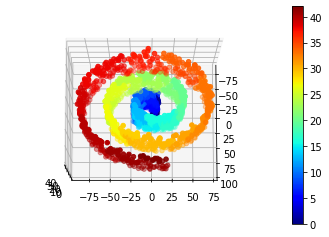

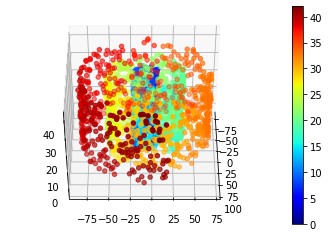

In [9]:
# use modularity to run clustering by the geodesic distance
display('modularity + geodesic distance')
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
p1 = ax.scatter(x, y, z, c = labelRE, cmap = plt.get_cmap('jet'))
fig1.colorbar(p1)
ax.view_init(80, 0)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
p2 = ax.scatter(x, y, z, c = labelRE, cmap = plt.get_cmap('jet'))
fig2.colorbar(p2)
ax.view_init(45, 0)

'modularity + Euclidean distance'

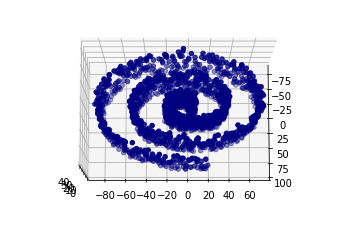

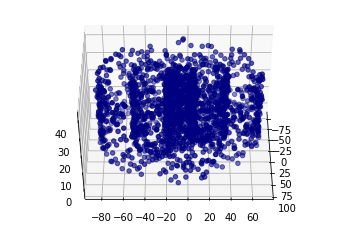

In [10]:
# use modularity to run clustering by the Euclidean distance
display('modularity + Euclidean distance')
fig1 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
ax.scatter(x, y, z, c = labelRE2, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
ax.scatter(x, y, z, c = labelRE2, cmap = plt.get_cmap('jet'))
ax.view_init(45, 0)

'k-mean + geodesic distance'

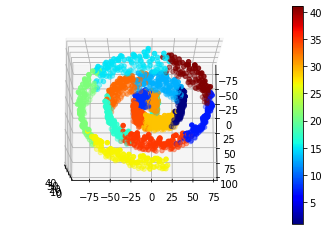

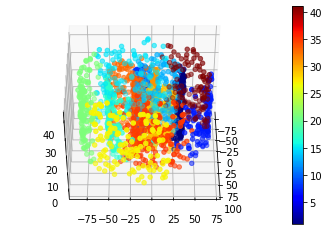

In [11]:
# use k-mean to run clustering by the geodesic distance
display('k-mean + geodesic distance')
from sklearn.cluster import KMeans
geodesic_kmean = KMeans(n_clusters = int(size), random_state = 0).fit_predict(XYZ_E)

label3 = np.zeros((len(XYZ_C),1))
for j in geodesic_kmean:
    for i in range(len(XYZ_C)) :
        if geodesic_kmean[i+1] == j:            
            label3[i] =  j
labelRE3 = np.reshape(label3, len(XYZ_C))

fig1 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
p1 = ax.scatter(x, y, z, c = labelRE3, cmap = plt.get_cmap('jet'))
fig1.colorbar(p1)
ax.view_init(80, 0)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
p2 = ax.scatter(x, y, z, c = labelRE3, cmap = plt.get_cmap('jet'))
fig2.colorbar(p2)
ax.view_init(45, 0)

'k-mean + Euclidean distance'

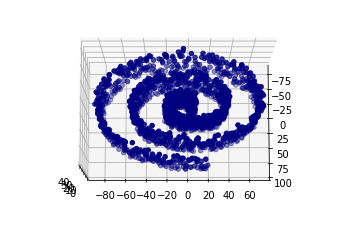

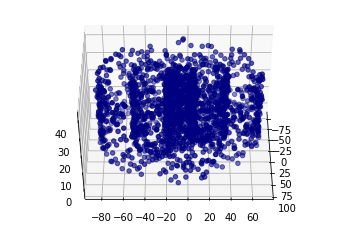

In [12]:
# use k-mean to run clustering by the Euclidean distance
display('k-mean + Euclidean distance')
from sklearn.cluster import KMeans
euclidean_kmean = KMeans(n_clusters = int(size2), random_state = 0).fit_predict(Euclidean_distance)

label4 = np.zeros((len(XYZ_C),1))
for j in euclidean_kmean:
    for i in range(len(XYZ_C)) :
        if euclidean_kmean[i+1] == j:            
            label4[i] =  j
labelRE4 = np.reshape(label4, len(XYZ_C))

fig1 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
ax.scatter(x, y, z, c = labelRE4, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
ax.scatter(x, y, z, c = labelRE4, cmap = plt.get_cmap('jet'))
ax.view_init(45, 0)